In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Generate a simple dataset for a classification problem
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

X[:5]
y[:5]


array([0, 0, 1, 0, 0])

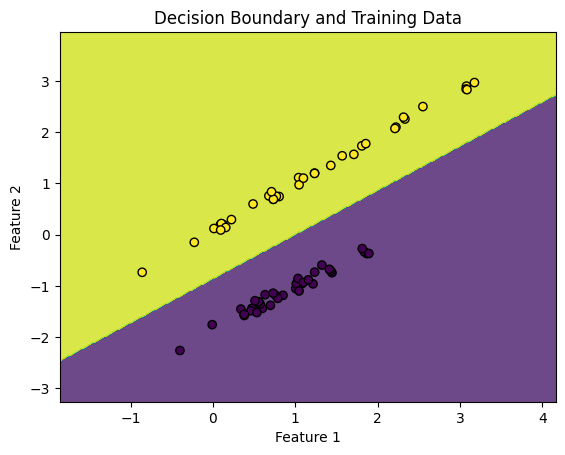

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train a classification model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 3. Visualize the outcome
# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary and Training Data')
    plt.show()

plot_decision_boundary(model, X_train, y_train)


In [ ]:

# 4. Make example predictions
example_data = np.array([[0, 0], [1, 1], [2, 2]])
predictions = model.predict(example_data)
print(f"Predictions for {example_data} are {predictions}")

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")
plt.show()